In [1]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-

"""
# Algorithm description

 Agglomerative clustering guarantees that similar instances end up in the same cluster. We start by having each 
 instance being in its own singleton cluster, then iteratively do the following steps: (1) Start with a collection C of 
 singleton clusters.Each cluster contains a one single point c(i)={x(i)}
 2)Repeat until only one cluster is left.
    a) find a pair of clusters that is closest: min D{i,j} = min D(c(i),c(j))
    b) Merge the clusters c(i,j) into new cluster C(i+j) i+j is not addition --it just means two clusters are connected now
    c) remove C(i),C(j) (singleton clusters) from the collection C and add C(i+j)
The result is a hierarcghial tree structure called the dendrogram.
# Data setup

Iteratively build hierarchical cluster between all data points.
O(n^2) complexity

URL/Biblography
=====
Author: Ryan Flynn <parseerror+agglomerative-clustering@gmail.com>
References:
a) https://www.youtube.com/watch?v=XJ3194AmH40
 1. "Hierarchical Clustering Algorithms", http://home.dei.polimi.it/matteucc/Clustering/tutorial_html/hierarchical.html
 2. "How to Explain Hierarchical Clustering", Stephen P. Borgatti, http://www.analytictech.com/networks/hiclus.htm, Retrieved May 25, 2011
 3. Johnson,S.C. 1967, "Hierarchical Clustering Schemes" Psychometrika, 2:241-254.
"""

class Cluster:
	def __init__(self):
		pass
	def __repr__(self):
		return '(%s,%s)' % (self.left, self.right)
	def add(self, clusters, grid, lefti, righti):
		self.left = clusters[lefti]
		self.right = clusters[righti]
		# merge columns grid[row][righti] and row grid[righti] into corresponding lefti
		for r in grid:
			r[lefti] = min(r[lefti], r.pop(righti))
		grid[lefti] = map(min, zip(grid[lefti], grid.pop(righti)))
		clusters.pop(righti)
		return (clusters, grid)

def agglomerate(labels, grid):
	"""
	given a list of labels and a 2-D grid of distances, iteratively agglomerate
	hierarchical Cluster
	"""
	clusters = labels
	while len(clusters) > 1:
		# find 2 closest clusters
		print clusters
		distances = [(1, 0, grid[1][0])]
		for i,row in enumerate(grid[2:]):
			distances += [(i+2, j, c) for j,c in enumerate(row[:i+2])]
		j,i,_ = min(distances, key=lambda x:x[2])
		# merge i<-j
		c = Cluster()
		clusters, grid = c.add(clusters, grid, i, j)
		clusters[i] = c
	return clusters.pop()

if __name__ == '__main__':

	# Ref #1
	ItalyCities = ['BA','FI','MI','NA','RM','TO']
	ItalyDistances = [
		[  0, 662, 877, 255, 412, 996],
		[662,   0, 295, 468, 268, 400],
		[877, 295,   0, 754, 564, 138],
		[255, 468, 754,   0, 219, 869],
		[412, 268, 564, 219,   0, 669],
		[996, 400, 138, 869, 669,   0]]
	print agglomerate(ItalyCities, ItalyDistances)
	"""
	(((BA,(NA,RM)),FI),(MI,TO))
	   |   |  |    |    |__|
	   |   |__|    |     |
	   |____|      |     |
	     |_________|     |
	          |__________|
	"""

	# Ref 2
	USACities = ['BOS','NY','DC','MIA','CHI','SEA','SF','LA','DEN']
	USADistances = [
		[   0,  206,  429, 1504,  963, 2976, 3095, 2979, 1949],
		[ 206,    0,  233, 1308,  802, 2815, 2934, 2786, 1771],
		[ 429,  233,    0, 1075,  671, 2684, 2799, 2631, 1616],
		[1504, 1308, 1075,    0, 1329, 3273, 3053, 2687, 2037],
		[ 963,  802,  671, 1329,    0, 2013, 2142, 2054,  996],
		[2976, 2815, 2684, 3273, 2013,    0,  808, 1131, 1307],
		[3095, 2934, 2799, 3053, 2142,  808,    0,  379, 1235],
		[2979, 2786, 2631, 2687, 2054, 1131,  379,    0, 1059],
		[1949, 1771, 1616, 2037,  996, 1307, 1235, 1059,    0]]
	print agglomerate(USACities, USADistances)
	"""
	((((((BOS,NY),DC),CHI),DEN),(SEA,(SF,LA))),MIA)
               |__|   |    |    |     |   |  |      |
                |_____|    |    |     |   |  |      |
                   |       |    |     |   |__|      |
                   |_______|    |     |    |        |
                       |        |     |____|        |
                       |________|       |           |
                            |___________|           |
                                  |_________________|
	"""

['BA', 'FI', 'MI', 'NA', 'RM', 'TO']
['BA', 'FI', (MI,TO), 'NA', 'RM']
['BA', 'FI', (MI,TO), (NA,RM)]
[(BA,(NA,RM)), 'FI', (MI,TO)]
[((BA,(NA,RM)),FI), (MI,TO)]
(((BA,(NA,RM)),FI),(MI,TO))
['BOS', 'NY', 'DC', 'MIA', 'CHI', 'SEA', 'SF', 'LA', 'DEN']
[(BOS,NY), 'DC', 'MIA', 'CHI', 'SEA', 'SF', 'LA', 'DEN']
[((BOS,NY),DC), 'MIA', 'CHI', 'SEA', 'SF', 'LA', 'DEN']
[((BOS,NY),DC), 'MIA', 'CHI', 'SEA', (SF,LA), 'DEN']
[(((BOS,NY),DC),CHI), 'MIA', 'SEA', (SF,LA), 'DEN']
[(((BOS,NY),DC),CHI), 'MIA', (SEA,(SF,LA)), 'DEN']
[((((BOS,NY),DC),CHI),DEN), 'MIA', (SEA,(SF,LA))]
[(((((BOS,NY),DC),CHI),DEN),(SEA,(SF,LA))), 'MIA']
((((((BOS,NY),DC),CHI),DEN),(SEA,(SF,LA))),MIA)


In [ ]:
Example 2  
This documentation is for scikit-learn version 0.17 — Other versions

If you use the software, please consider citing scikit-learn.

Agglomerative clustering with and without structure


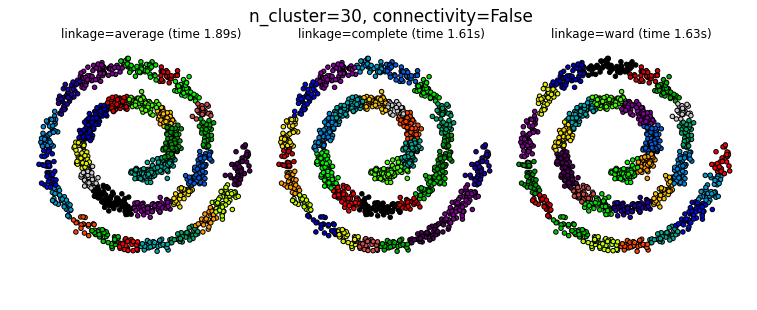

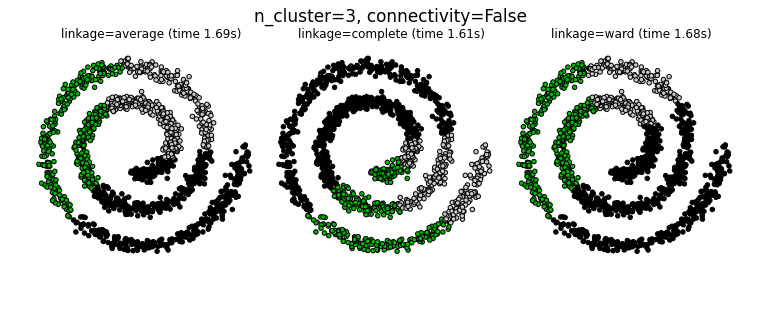

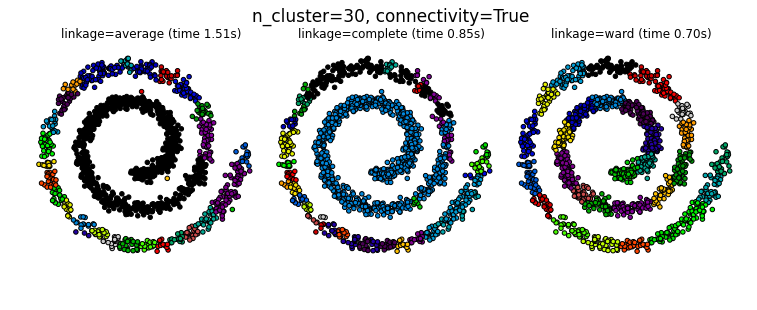

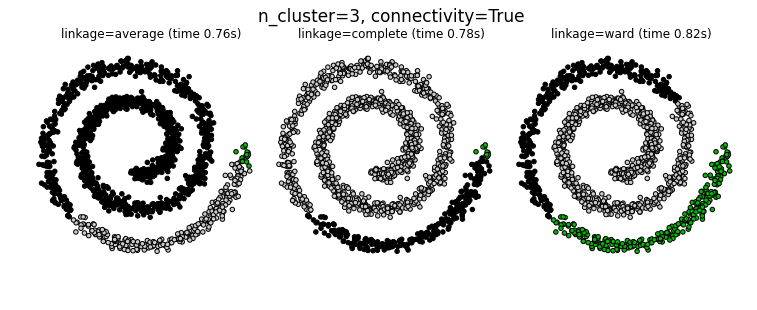

In [2]:
# Agglomerative clustering with and without structure
# Authors: Gael Varoquaux, Nelle Varoquaux
# License: BSD 3 clause
# URL: http://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering.html#example-cluster-plot-agglomerative-clustering-py

%matplotlib inline
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Generate sample data
n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)


X = np.concatenate((x, y))
X += .7 * np.random.randn(2, n_samples)
X = X.T

# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 30, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average', 'complete', 'ward')):
            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
                        cmap=plt.cm.spectral)
            plt.title('linkage=%s (time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()